### **Objective:**
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [ ]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv("/content/Sales_data.csv", encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Sales_data.csv'

1.2. Display the top 10 rows of the dataframe:

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


1.4. Convert the InvoiceDate column to datetime format:



In [ ]:
df['InvoiceDate'] =pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

<ipython-input-5-2d617e377e5c>:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [ ]:
df['StockCode'].nunique()

4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [ ]:
top10_products = df.groupby('StockCode')['Quantity'].sum().reset_index()
top10_products

,StockCode,Quantity
0,10002,1037
1,10080,495
2,10120,193
3,10123C,-13
4,10123G,-38
...,...,...
4065,gift_0001_20,20
4066,gift_0001_30,37
4067,gift_0001_40,3
4068,gift_0001_50,4


2.3. How many unique customers are there in the dataset?



In [ ]:
df['CustomerID'].nunique()

4372

2.4. Which country has the maximum number of unique customers?



In [ ]:
country_by_customers= df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

top_country_by_customers = country_by_customers.index[0]
top_country_by_customers

'United Kingdom'

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



In [ ]:
total_price_by_invoice = df.groupby('InvoiceNo')['TotalPrice'].sum()

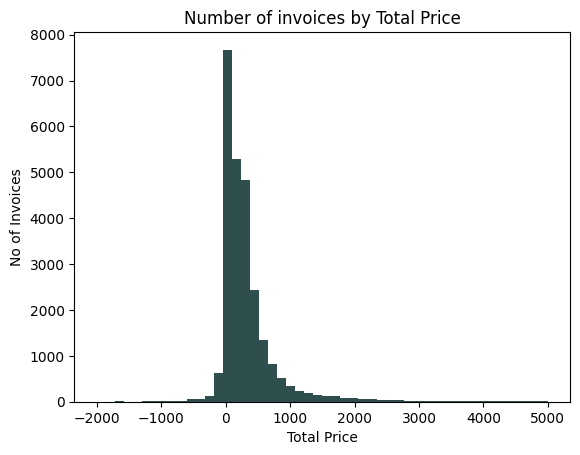

In [ ]:
plt.hist(total_price_by_invoice, bins= 50, range=[-2000, 5000], color='darkslategray')
plt.title("Number of invoices by Total Price")
plt.xlabel("Total Price")
plt.ylabel("No of Invoices")

plt.show()


## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [ ]:
sales_per_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
sales_per_country

,TotalPrice
Country,
United Kingdom,8187806.364
Netherlands,284661.540
EIRE,263276.820
Germany,221698.210
France,197403.900
Australia,137077.270
Switzerland,56385.350
Spain,54774.580
Belgium,40910.960


3.2. Identify the month in which the sales were highest.



In [ ]:
sales_per_month = df.groupby(df['InvoiceDate'].dt.month)['TotalPrice'].sum().sort_values(ascending=False)
sales_per_month

,TotalPrice
InvoiceDate,
11,1461756.250
12,1182625.030
10,1070704.670
9,1019687.622
5,723333.510
6,691123.120
3,683267.080
8,682680.510
7,681300.111


3.3. Compute the average unit price per product.



In [ ]:
avg_unit_price = df.groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False)
avg_unit_price

,UnitPrice
StockCode,
AMAZONFEE,7324.784706
CRUK,495.839375
M,375.566392
DOT,290.495859
BANK CHARGES,202.855162
...,...
84526,0.000000
72732,0.000000
85018B,0.000000


3.4. Compute the total quantity sold per customer.



In [ ]:
sell_per_customer = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)
sell_per_customer

,Quantity
CustomerID,
14646.0,196719
12415.0,77242
14911.0,77180
17450.0,69029
18102.0,64122
...,...
16252.0,-158
16742.0,-189
14213.0,-244


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



Text(0.5, 0, 'Sales (in million $)')

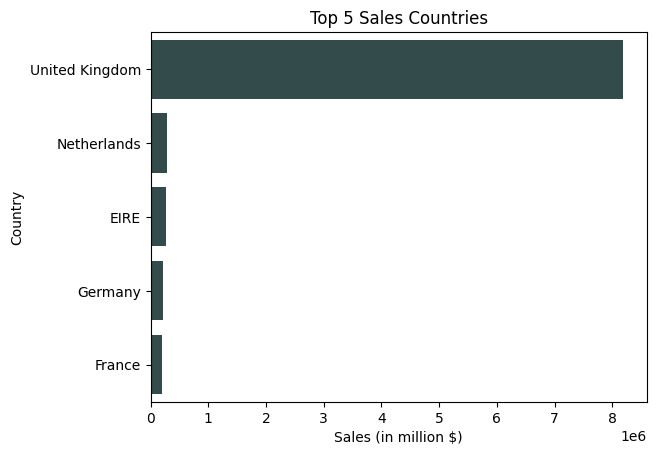

In [ ]:
top = 5

sns.barplot(x = sales_per_country[:top].values, y=sales_per_country[:top].index, color='darkslategray')
plt.title(f"Top {top} Sales Countries")
plt.xlabel("Sales (in million $)")

4.2. Plot a line graph to showcase the trend of sales over time.



In [ ]:
#creating a series aggregating sales and dates
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

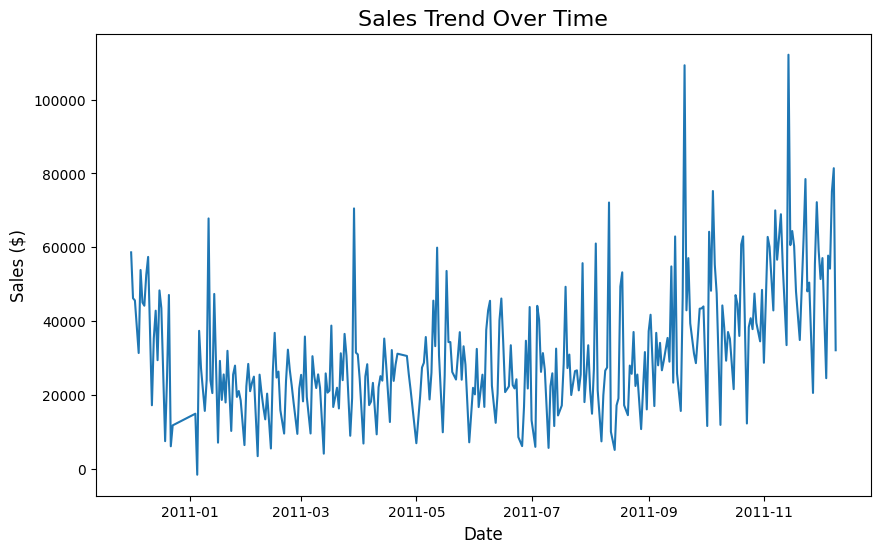

In [ ]:
# Plotting the line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(sales_over_time)

# Add labels and title
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# Show the plot
plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



Text(0.5, 1.0, 'Quantity VS Unit Price')

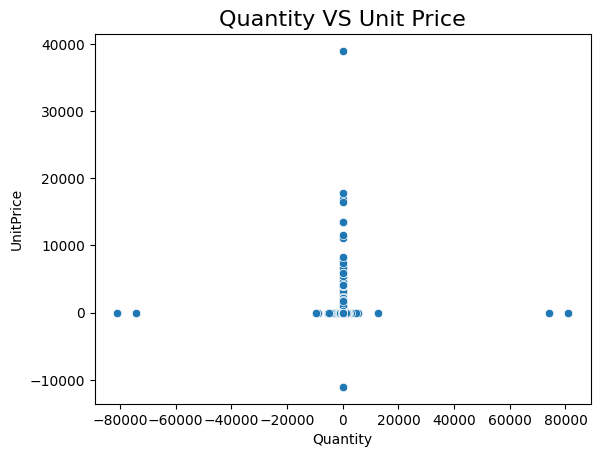

In [ ]:
sns.scatterplot(data=df, x = 'Quantity', y='UnitPrice')
plt.title("Quantity VS Unit Price", fontsize=16)

4.4. Plot a heatmap to display the correlation between numeric columns.



In [ ]:
#extracting numeric columns
df_num = df.select_dtypes("number")

#correlation
correlation = df_num.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

correlation

,Quantity,UnitPrice,CustomerID,TotalPrice
Quantity,1.000000,-0.001235,-0.003600,0.886681
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
TotalPrice,0.886681,-0.162029,-0.002274,1.000000


In [ ]:
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



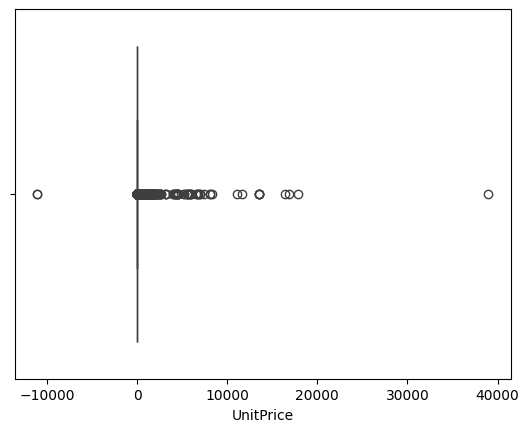

In [ ]:
#extracting numeric columns
df_num = df.select_dtypes("number")

fig, ax = plt.subplots()

sns.boxplot(data=df_num, x=df_num['UnitPrice'])
plt.show()


5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



Text(0.5, 1.0, 'Sales Trend of Top 5 Products (Quantity)')

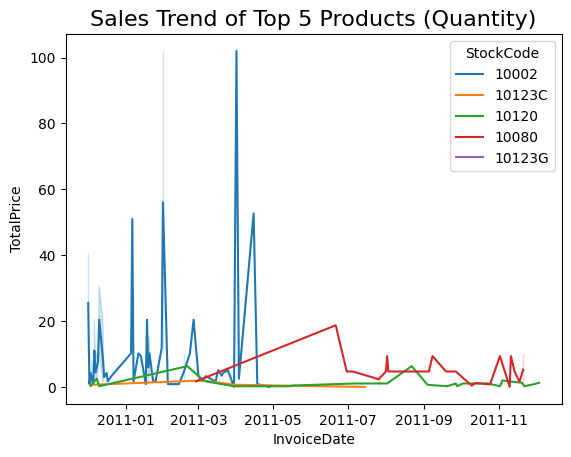

In [ ]:
#taking the top 5 product from an already created series
top5 = list(top10_products[:5]["StockCode"])

#slicing from the main df only the rows of those products
top5_df = df[df['StockCode'].isin(top5)]

sns.lineplot(x = top5_df['InvoiceDate'].dt.date,
             y = top5_df['TotalPrice'],
             hue = top5_df['StockCode'])
plt.title("Sales Trend of Top 5 Products (Quantity)", fontsize=16)

# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [ ]:
df['ReturnFlag'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [ ]:
# Set a date to calculate Recency from (e.g., today or end of the analysis period)
#current_date = dt.datetime.now().date()
current_date = df['InvoiceDate'].max().date()

# Group by customer_id and aggregate to calculate RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.dt.date.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'recency',
    'InvoiceNo': 'frequency',
    'TotalPrice': 'monetary'
}).reset_index()


5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).

Moved here from task 5

In [ ]:
# Assign R, F, M scores using quantiles
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['freq_score'] = pd.cut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single score (optional)
rfm_df['rfm_score'] = rfm_df['r_score'].astype(str) + rfm_df['freq_score'].astype(str) + rfm_df['m_score'].astype(str)

# Define segments based on RFM scores
def segment_customers(df):
    if df['rfm_score'] in ['444', '344', '434', '443']:
        return 'Best Customers'
    elif df['rfm_score'][1] in ['4', '3']:
        return 'Loyal Customers'
    elif df['rfm_score'][2] in ['4', '3']:
        return 'Big Spenders'
    elif df['rfm_score'][:2] == '11':
        return 'Hibernating'
    elif df['rfm_score'][0] in ['1', '2']:
        return 'At Risk'
    else:
        return 'Other'

rfm_df['segment'] = rfm_df.apply(segment_customers, axis=1)

rfm_df

,CustomerID,recency,frequency,monetary,r_score,freq_score,m_score,rfm_score,segment
0,12346.0,325,2,0.00,1,1,1,111,Hibernating
1,12347.0,2,7,4310.00,4,1,4,414,Big Spenders
2,12348.0,75,4,1797.24,2,1,4,214,Big Spenders
3,12349.0,18,1,1757.55,3,1,4,314,Big Spenders
4,12350.0,310,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111,Hibernating
4368,18281.0,180,1,80.82,1,1,1,111,Hibernating
4369,18282.0,7,3,176.60,4,1,1,411,Other
4370,18283.0,3,16,2094.88,4,1,4,414,Big Spenders


7.2. Normalize the RFM matrix with StandardScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting the RFM columns for scaling
rfm_df[['recency', 'frequency', 'monetary']] = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

rfm_df

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,12346.0,2.316568,-0.391720,-0.231001,1,1,1,111,Other
1,12347.0,-0.889050,0.382657,0.293432,4,4,4,444,Best Customers
2,12348.0,-0.164560,-0.266959,-0.012316,2,2,4,224,Other
3,12349.0,-0.730258,-0.086271,-0.017146,3,3,4,334,Other
4,12350.0,2.167700,-0.327188,-0.190312,1,1,2,112,Other
...,...,...,...,...,...,...,...,...,...
4367,18280.0,1.840191,-0.357303,-0.209026,1,1,1,111,Other
4368,18281.0,0.877514,-0.370209,-0.221167,1,1,1,111,Other
4369,18282.0,-0.839427,-0.344397,-0.209513,4,1,1,411,At-Risk Customers
4370,18283.0,-0.879125,2.852058,0.023900,4,4,4,444,Best Customers


7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

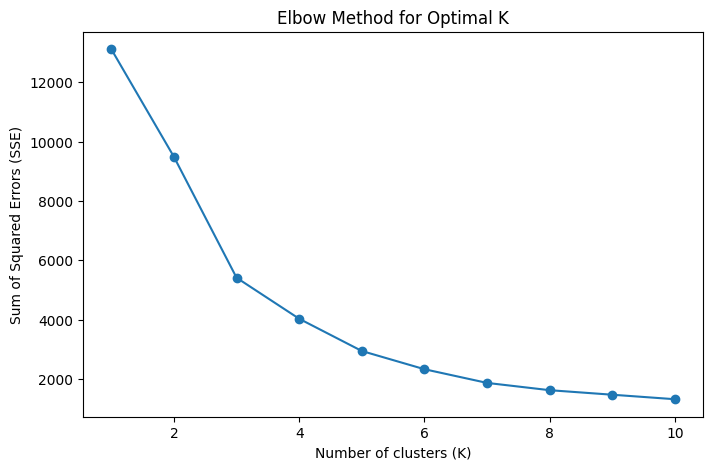

In [ ]:
from sklearn.cluster import KMeans

rfm_scaled = rfm_df[['recency', 'frequency', 'monetary']]

# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on the Elbow method, choose the optimal K
# Assume from the plot that the elbow is at 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

# Advanced EDA Techniques:

## 11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

## 12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

# Advanced Modeling Techniques:

## 13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.